In [27]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#loading dataset
df= pd.read_csv("marginal.csv") 
df.head()

,Table Code,State Code,District Code,Area Name,Total/ Rural/ Urban,Age group,Worked for 3 months or more but less than 6 months - Persons,Worked for 3 months or more but less than 6 months - Males,Worked for 3 months or more but less than 6 months - Females,Worked for less than 3 months - Persons,...,Industrial Category - N to O - Females,Industrial Category - P to Q - Persons,Industrial Category - P to Q - Males,Industrial Category - P to Q - Females,Industrial Category - R to U - HHI - Persons,Industrial Category - R to U - HHI - Males,Industrial Category - R to U - HHI - Females,Industrial Category - R to U - Non HHI - Persons,Industrial Category - R to U - Non HHI - Males,Industrial Category - R to U - Non HHI - Females
0,B0806SC,`33,`000,State - TAMIL NADU,Total,Total,1200828,589003,611825,221386,...,3565,11080,4019,7061,16833,4266,12567,122088,55801,66287
1,B0806SC,`33,`000,State - TAMIL NADU,Total,`5-14,27791,14125,13666,2447,...,11,122,71,51,427,169,258,19305,9774,9531
2,B0806SC,`33,`000,State - TAMIL NADU,Total,15-34,514340,259560,254780,92423,...,1754,7536,2718,4818,8346,2127,6219,68929,32803,36126
3,B0806SC,`33,`000,State - TAMIL NADU,Total,35-59,542581,251957,290624,99202,...,1619,3205,1131,2074,6591,1487,5104,26498,9675,16823
4,B0806SC,`33,`000,State - TAMIL NADU,Total,60+,115103,62833,52270,27165,...,175,211,93,118,1457,483,974,7065,3394,3671


In [7]:
df.isnull().sum(axis=0)

Table Code                                          0
State Code                                          0
District Code                                       0
Area Name                                           0
Total/ Rural/ Urban                                 0
                                                   ..
Industrial Category - R to U - HHI - Males          0
Industrial Category - R to U - HHI - Females        0
Industrial Category - R to U - Non HHI - Persons    0
Industrial Category - R to U - Non HHI - Males      0
Industrial Category - R to U - Non HHI - Females    0
Length: 69, dtype: int64

In [23]:
# Retrieve training and testing dataset
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [11]:
# print the training data
print(X) 

    Table Code State Code District Code            Area Name  \
0      B0806SC        `33          `000   State - TAMIL NADU   
1      B0806SC        `33          `000   State - TAMIL NADU   
2      B0806SC        `33          `000   State - TAMIL NADU   
3      B0806SC        `33          `000   State - TAMIL NADU   
4      B0806SC        `33          `000   State - TAMIL NADU   
..         ...        ...           ...                  ...   
589    B0806SC        `33          `633  District - Tiruppur   
590    B0806SC        `33          `633  District - Tiruppur   
591    B0806SC        `33          `633  District - Tiruppur   
592    B0806SC        `33          `633  District - Tiruppur   
593    B0806SC        `33          `633  District - Tiruppur   

    Total/ Rural/ Urban       Age group  \
0                 Total           Total   
1                 Total           `5-14   
2                 Total           15-34   
3                 Total           35-59   
4               

In [13]:
#print the testing data
print(Y)

0      66287
1       9531
2      36126
3      16823
4       3671
       ...  
589      124
590      428
591      176
592       46
593        0
Name: Industrial Category - R to U - Non HHI - Females, Length: 594, dtype: int64


In [14]:
# Select relevant columns for analysis
selected_columns = ['Age group', 'Industrial Category - A - Cultivators - Persons',
                    'Industrial Category - B - Persons', 'Industrial Category - C - HHI - Persons',
                    'Industrial Category - D & E - Persons', 'Industrial Category - F - Persons',
                    'Industrial Category - G - HHI - Persons', 'Industrial Category - H - Persons',
                    'Industrial Category - I - Persons', 'Industrial Category - J - HHI - Persons',
                    'Industrial Category - K to M - Persons', 'Industrial Category - N to O - Persons',
                    'Industrial Category - P to Q - Persons', 'Industrial Category - R to U - HHI - Persons']

In [24]:
# Filter the DataFrame for marginal workers and selected columns
marginal_workers_df = df[df['Total/ Rural/ Urban'] == 'Total'][selected_columns]


In [25]:
# Group by age group and sum the counts for each industrial category
age_group_data = marginal_workers_df.groupby('Age group').sum()


<Figure size 1080x576 with 0 Axes>

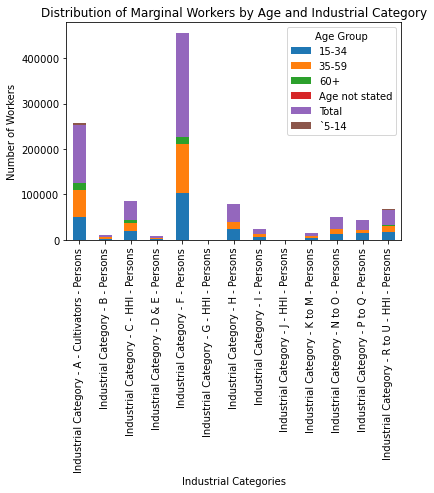

In [28]:
# Plotting
plt.figure(figsize=(15, 8))
age_group_data.T.plot(kind='bar', stacked=True)
plt.title('Distribution of Marginal Workers by Age and Industrial Category')
plt.xlabel('Industrial Categories')
plt.ylabel('Number of Workers')
plt.legend(title='Age Group')
plt.show()
